Columns after cleaning:
Index(['name', 'critic_score', 'user_score', 'total_shipped'], dtype='object')


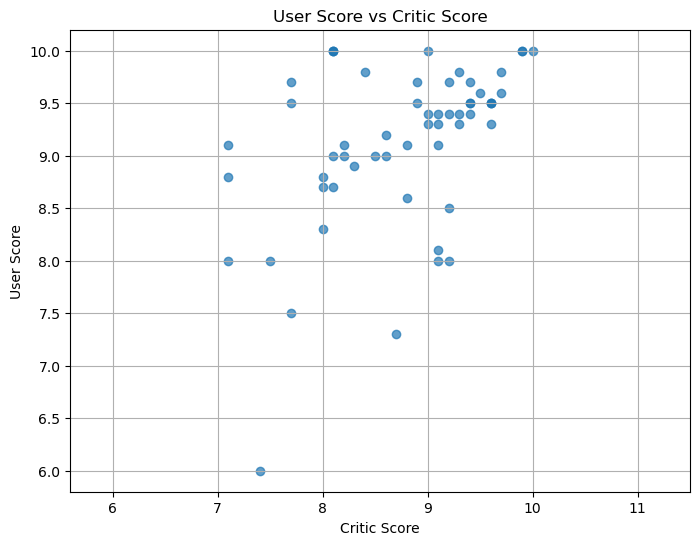

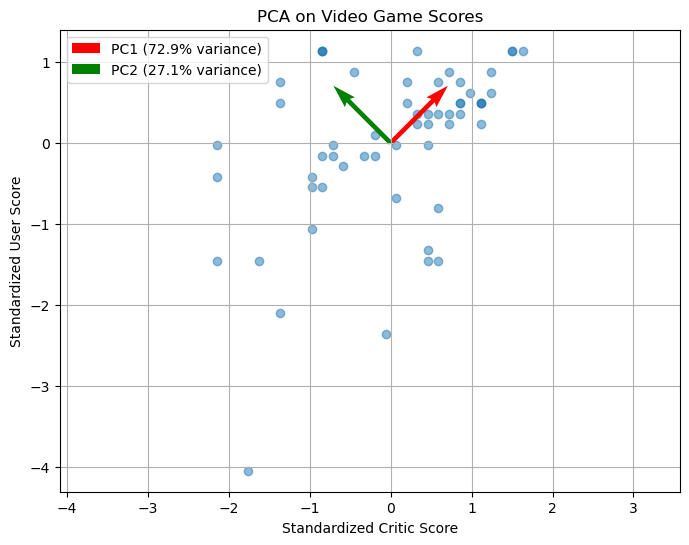

In [3]:
# Import the libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("homeworh8.csv")

# Step 2: Clean the column names (removes spaces, lowercase everything)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Print the column names to make sure they look right
print("Columns after cleaning:")
print(df.columns)

# Step 3: Select the data for PCA (critic score and user score only)
# Dropping rows with missing values just in case
scores = df[['critic_score', 'user_score']].dropna()

# Step 4: Make a scatterplot of user vs critic scores
plt.figure(figsize=(8, 6))
plt.scatter(scores['critic_score'], scores['user_score'], alpha=0.7)
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("User Score vs Critic Score")
plt.grid(True)
plt.axis('equal')
plt.show()

# Step 5: Standardize the data before PCA (very important for accurate results)
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(scores)

# Step 6: Apply PCA
pca = PCA(n_components=2)
pca.fit(scaled_scores)

# Step 7: Extract principal components and variance explained
pc_vectors = pca.components_      # directions of PC1 and PC2
explained = pca.explained_variance_ratio_  # how much variance each PC explains

# Step 8: Plot the standardized data with principal component vectors
plt.figure(figsize=(8, 6))
plt.scatter(scaled_scores[:, 0], scaled_scores[:, 1], alpha=0.5)
plt.xlabel("Standardized Critic Score")
plt.ylabel("Standardized User Score")
plt.title("PCA on Video Game Scores")

# Add arrows for principal components
origin = [0, 0]
colors = ['red', 'green']
labels = ['PC1', 'PC2']

for i in range(2):
    plt.quiver(
        origin[0], origin[1],
        pc_vectors[i, 0], pc_vectors[i, 1],
        color=colors[i],
        angles='xy',
        scale_units='xy',
        scale=1,
        label=f"{labels[i]} ({explained[i]*100:.1f}% variance)"
    )

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
